**Credit Card Approvals**

Introduction:
This data has information concerning credit card applications. When reviewing credit card applications, many factors are considered, such as gender, age, debt history, year employed, etc, to check whether the applicant is a reliable and non-risky individual for the bank to approve a credit card. In this dataset, will explore how the many variables may influence a bank’s decision to approve or reject a credit card application.

Our question for this project is whether we can predict which people in the dataset are successful in applying for a credit card.
The data set we will be using is  Quinlan,J. R Credit Approval data set, linked here: Quinlan,J. R.. Credit Approval. UCI Machine Learning Repository. https://doi.org/10.24432/C5FS30
This is a multivariate business dataset. 
The dataset we will be using has columns for: 
“Gender”, ”Age”, ”Debt”, ”Married”, ”BankCustomer”, ”Industry”, ”Ethnicity”, ”YearsEmployed”, ”PriorDefault”, ”Employed”, ”CreditScore”, ”DriversLicense”, ”Citizen”, ”ZipCode”, ”Income”, ”Approved”
Which are mixtures of integers, real, and categorical variables that are used to determine whether someone gets approved for a credit card or not.

Preliminary exploratory data analysis:

In [1]:
### Run this cell before continuing.
import altair as alt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

(i) Reading data from the web into Python:

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/18Uxxd5YAfGLn4qWe5crLplKU19zPXPziaomAZLWpDyI/gviz/tq?tqx=out:csv&sheet=clean_dataset')

data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


(ii) Cleaning and wrangling data:
- Dropped the column that we deemed unnecesary: "DriversLicense"
- Changed the values of "Gender", "Married", "PriorDefaut", "Employed", and "Approved" columns from 0s and 1s to something that we more appropriately felt captured the columns. This is because they were being treated like quantitative variables in terms of data analyses functions, and we felt that it would make the data more readable and user-friendly
- Split the data further into 2 more datasets by gender (male and female) to help us better understand the effect of gender on credit card approvals

In [3]:
# clean and wrangle data:
data["Gender"] = data["Gender"].replace({
     0 : "Female",
     1 : "Male"
 })

data["Married"] = data["Married"].replace({
     0 : "No",
     1 : "Yes"
 })

data["PriorDefault"] = data["PriorDefault"].replace({
     0 : "No",
     1 : "Yes"
 })

data["Employed"] = data["Employed"].replace({
     0 : "No",
     1 : "Yes"
 })

data["Approved"] = data["Approved"].replace({
     0 : "No",
     1 : "Yes"
 })

data = data.drop('DriversLicense', axis=1)

data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,ZipCode,Income,Approved
0,Male,30.83,0.000,Yes,1,Industrials,White,1.25,Yes,Yes,1,ByBirth,202,0,Yes
1,Female,58.67,4.460,Yes,1,Materials,Black,3.04,Yes,Yes,6,ByBirth,43,560,Yes
2,Female,24.50,0.500,Yes,1,Materials,Black,1.50,Yes,No,0,ByBirth,280,824,Yes
3,Male,27.83,1.540,Yes,1,Industrials,White,3.75,Yes,Yes,5,ByBirth,100,3,Yes
4,Male,20.17,5.625,Yes,1,Industrials,White,1.71,Yes,No,0,ByOtherMeans,120,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Male,21.08,10.085,No,0,Education,Black,1.25,No,No,0,ByBirth,260,0,No
686,Female,22.67,0.750,Yes,1,Energy,White,2.00,No,Yes,2,ByBirth,200,394,No
687,Female,25.25,13.500,No,0,Healthcare,Latino,2.00,No,Yes,1,ByBirth,200,1,No
688,Male,17.92,0.205,Yes,1,ConsumerStaples,White,0.04,No,No,0,ByBirth,280,750,No


In [4]:
male_data = data[data['Gender'] == 'Male']
male_data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,ZipCode,Income,Approved
0,Male,30.83,0.000,Yes,1,Industrials,White,1.250,Yes,Yes,1,ByBirth,202,0,Yes
3,Male,27.83,1.540,Yes,1,Industrials,White,3.750,Yes,Yes,5,ByBirth,100,3,Yes
4,Male,20.17,5.625,Yes,1,Industrials,White,1.710,Yes,No,0,ByOtherMeans,120,0,Yes
5,Male,32.08,4.000,Yes,1,CommunicationServices,White,2.500,Yes,No,0,ByBirth,360,0,Yes
6,Male,33.17,1.040,Yes,1,Transport,Black,6.500,Yes,No,0,ByBirth,164,31285,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Male,36.42,0.750,No,0,Real Estate,White,0.585,No,No,0,ByBirth,240,3,No
684,Male,40.58,3.290,Yes,1,CommunicationServices,White,3.500,No,No,0,ByOtherMeans,400,0,No
685,Male,21.08,10.085,No,0,Education,Black,1.250,No,No,0,ByBirth,260,0,No
688,Male,17.92,0.205,Yes,1,ConsumerStaples,White,0.040,No,No,0,ByBirth,280,750,No


In [5]:
female_data = data[data['Gender'] == 'Female']
female_data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,ZipCode,Income,Approved
1,Female,58.67,4.460,Yes,1,Materials,Black,3.040,Yes,Yes,6,ByBirth,43,560,Yes
2,Female,24.50,0.500,Yes,1,Materials,Black,1.500,Yes,No,0,ByBirth,280,824,Yes
7,Female,22.92,11.585,Yes,1,InformationTechnology,White,0.040,Yes,No,0,ByBirth,80,1349,Yes
12,Female,38.25,6.000,Yes,1,Financials,White,1.000,Yes,No,0,ByBirth,0,0,Yes
14,Female,45.83,10.500,Yes,1,Materials,White,5.000,Yes,Yes,7,ByBirth,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Female,30.58,10.665,Yes,1,Materials,Black,0.085,No,Yes,12,ByBirth,129,3,No
678,Female,17.92,10.210,Yes,1,Healthcare,Latino,0.000,No,No,0,ByBirth,0,50,No
679,Female,20.08,1.250,Yes,1,Energy,White,0.000,No,No,0,ByBirth,0,0,No
686,Female,22.67,0.750,Yes,1,Energy,White,2.000,No,Yes,2,ByBirth,200,394,No


(iii) Split the dataset into training and testing, and summarize it
We summarized the data to show:
- Count and non null columns
- Description of quantitative variables (age, debt, bank customer, years employed, credit score, zip code, income)
- Approval by gender
- Means of predictor variables

In [6]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=123)

In [7]:
data_train

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,ZipCode,Income,Approved
618,Male,29.58,4.750,Yes,1,CommunicationServices,White,2.000,No,Yes,1,ByBirth,460,68,No
121,Male,25.67,12.500,Yes,1,InformationTechnology,White,1.210,Yes,Yes,67,ByBirth,140,258,Yes
352,Male,22.50,11.500,No,0,CommunicationServices,White,1.500,No,No,0,ByBirth,0,4000,No
210,Male,39.33,5.875,Yes,1,InformationTechnology,Black,10.000,Yes,Yes,14,ByBirth,399,0,Yes
299,Male,22.17,12.125,Yes,1,Energy,White,3.335,No,Yes,2,ByBirth,180,173,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Female,22.50,11.000,No,0,Materials,White,3.000,Yes,No,0,ByBirth,268,0,No
322,Female,33.67,0.375,Yes,1,InformationTechnology,White,0.375,No,No,0,ByBirth,300,44,Yes
382,Female,24.33,2.500,No,0,ConsumerDiscretionary,Asian,4.500,No,No,0,ByBirth,200,456,No
365,Male,42.83,1.250,Yes,1,CommunicationServices,White,13.875,No,Yes,1,ByBirth,352,112,No


In [8]:
data_test

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,ZipCode,Income,Approved
399,Male,31.00,2.085,Yes,1,Energy,White,0.085,No,No,0,ByBirth,300,0,No
250,Male,40.25,21.500,Yes,1,Education,Other,20.000,Yes,Yes,11,ByBirth,0,1200,Yes
396,Male,29.83,2.040,No,0,Utilities,Black,0.040,No,No,0,ByBirth,128,1,No
192,Male,41.75,0.960,Yes,1,Utilities,White,2.500,Yes,No,0,ByBirth,510,600,Yes
602,Male,29.83,1.250,No,0,Financials,White,0.250,No,No,0,ByBirth,224,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Male,37.50,1.750,No,0,Energy,Asian,0.250,Yes,No,0,ByBirth,164,400,No
572,Male,21.92,0.540,No,0,Utilities,White,0.040,Yes,Yes,1,ByBirth,840,59,Yes
101,Male,35.25,16.500,No,0,Energy,White,4.000,Yes,No,0,ByBirth,80,0,No
195,Male,28.25,5.040,No,0,Energy,Asian,1.500,Yes,Yes,8,ByBirth,144,7,Yes


In [9]:
# data summary: non null columns
data_summary_info = data_train.info()
data_summary_info

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 618 to 510
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         517 non-null    object 
 1   Age            517 non-null    float64
 2   Debt           517 non-null    float64
 3   Married        517 non-null    object 
 4   BankCustomer   517 non-null    int64  
 5   Industry       517 non-null    object 
 6   Ethnicity      517 non-null    object 
 7   YearsEmployed  517 non-null    float64
 8   PriorDefault   517 non-null    object 
 9   Employed       517 non-null    object 
 10  CreditScore    517 non-null    int64  
 11  Citizen        517 non-null    object 
 12  ZipCode        517 non-null    int64  
 13  Income         517 non-null    int64  
 14  Approved       517 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 64.6+ KB


In [10]:
# data summary: description of quantitative variables (age, debt, bank customer, years employed, credit score, zip code, income)
data_summary_description = data_train.describe()
data_summary_description

,Age,Debt,BankCustomer,YearsEmployed,CreditScore,ZipCode,Income
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,31.539110,4.573714,0.781431,2.287495,2.537718,187.667311,884.789168
std,11.737083,4.889537,0.413675,3.343519,5.190651,179.309381,3395.134308
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.920000,0.875000,1.000000,0.250000,0.000000,75.000000,0.000000
50%,28.460000,2.710000,1.000000,1.000000,0.000000,160.000000,4.000000
75%,37.330000,6.665000,1.000000,3.000000,3.000000,280.000000,458.000000
max,80.250000,28.000000,1.000000,28.500000,67.000000,2000.000000,50000.000000


In [11]:
# data summary: approval by gender
data_summary_gender = data_train[['Gender', 'Approved']].value_counts()
data_summary_gender

Gender  Approved
Male    No          201
        Yes         155
Female  No           87
        Yes          74
Name: count, dtype: int64

In [12]:
# data summary: means of predictor variables
data_summary_means = pd.DataFrame()
data_summary_means['Approved'] = (data_train[data_train['Approved'] == 'Yes'].mean(numeric_only=True))
data_summary_means['Not Approved'] = (data_train[data_train['Approved'] == 'No'].mean(numeric_only=True))
data_summary_means

,Approved,Not Approved
Age,33.311485,30.129826
Debt,5.694476,3.682552
BankCustomer,0.851528,0.725694
YearsEmployed,3.413035,1.392535
CreditScore,4.820961,0.722222
ZipCode,164.502183,206.086806
Income,1752.209607,195.069444


(iv) Data visualization by:
- Approvals by gender
- Comparing the distributions of each of the predictor variables we plan to use in our analysis in a histogram

In [13]:
# data visualization: approvals by gender
data_vis_gender = alt.Chart(data_train).mark_bar().encode(
    x = alt.X('Gender'),
    y = alt.Y('count()'),
    color = alt.Color('Gender'),
).properties(
    height=100
).facet(
    "Approved:N",
)


data_vis_gender

alt.FacetChart(...)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Debt'}>,
        <Axes: title={'center': 'BankCustomer'}>],
       [<Axes: title={'center': 'YearsEmployed'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'ZipCode'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >]],
      dtype=object)

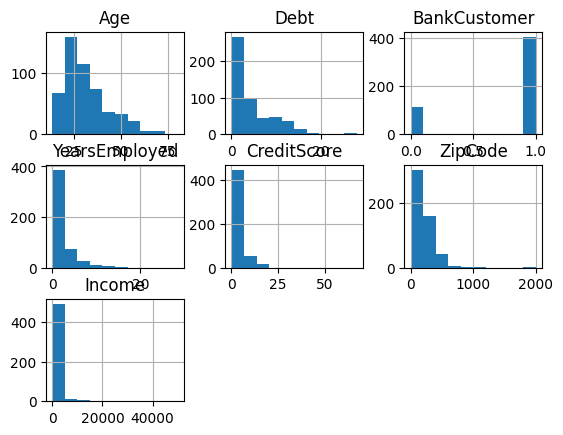

In [14]:
# data visualization: comparing the distributions of each of the predictor variables we plan to use in our analysis
data_vis_predictors = data_train.hist()
data_vis_predictors

Methods:
- Will train a classification model to predict, given various factors, whether or not someone is likely to be approved or rejected for a credit card. We intend to keep all the columns in the dataset thus far. Still, we may add more columns using existing data later on, such as the percentage of ethnic groups in our data set, to see how that may influence our prediction outcomes. 
- May use scatter plots and the facet function to visualize the relationship between two factors in the dataset in more detail.
- Will also use bar graphs or pie charts to compare the relative amounts of one variable compared to another; for ex. How many males vs females get approved for credit cards?


Expected outcomes and significance:


What do you expect to find?
- We expect to find and explore perhaps a bias amongst the ethnicities who get approved for credit cards. We may also see a gender and class bias amongst those approved. 

What impact could such findings have?
- These findings could help highlight any biases within the bank approval system, which can be used to improve this process and give individuals a more equal chance of obtaining a credit card, when their reason for rejection may be due to a prejudicial factor such as race or gender. 

What future questions could this lead to?

Future questions could include:
 - Identifying biases based on gender or ethnicity in credit card approval processes.
 - How can we better the current system to allow everyone a fair chance for credit card approvals?
 - To what scale does prior debt affect approval?
 - Creating a tool to predict whether someone will get approved?
